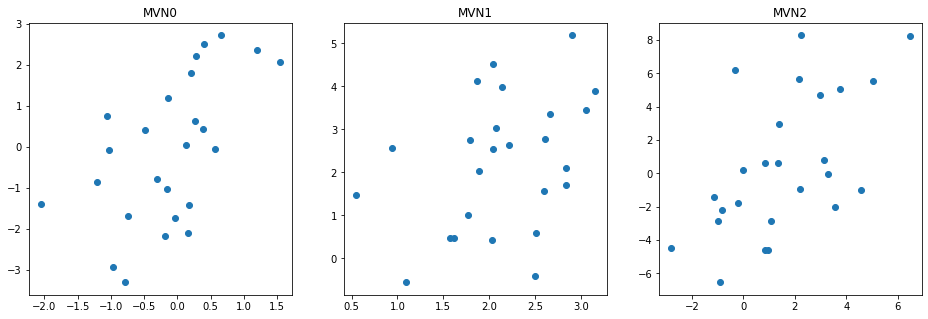

In [1]:
import matplotlib.pyplot as plt
import numpy as np

MVN1 = np.random.multivariate_normal([0,0], [[1,1],[1,4]], 25)
MVN2 = np.random.multivariate_normal([2,2], [[1,1],[1,4]], 25)
MVN3 = np.random.multivariate_normal([2,2], [[4,4],[4,16]], 25)

data = [MVN1,MVN2,MVN3]
fig = plt.figure(figsize=(16,5))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    ax.scatter(data[i][:,0], data[i][:,1])
    ax.set_title("MVN"+str(i))
plt.show()

In [2]:
def depthMah(pts,data):
    mah = []
    for pt in pts:
        dist = 1/(1+(pt-np.mean(data, 0)).T@np.linalg.inv(np.cov(data.T))@(pt-np.mean(data, 0)))
        mah.append(dist)
    return mah

In [3]:
mahs = []
for i in range(len(data)):
    mahs.append(depthMah(data[i], data[i]))

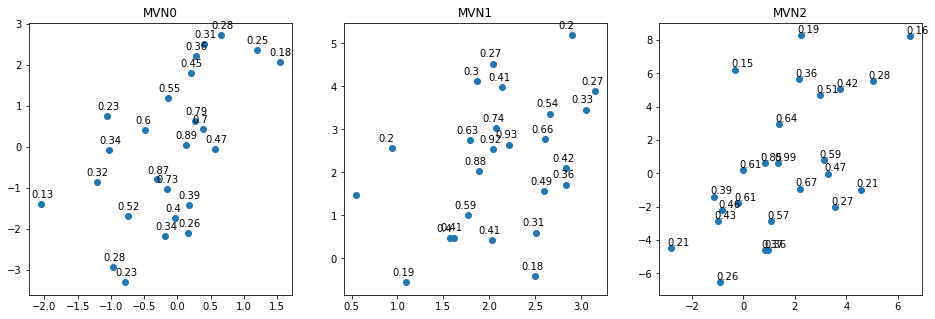

In [4]:
fig = plt.figure(figsize=(16,5))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    ax.scatter(data[i][:,0], data[i][:,1])
    ax.set_title("MVN"+str(i))
    for j, txt in enumerate(mahs[i]):
        ax.annotate(round(txt,2), (data[i][j, 0]-.15, data[i][j, 1]+.15))
plt.show()

In [8]:
def depthTuk(pts,data,ndirs=100):
    directions = np.random.multivariate_normal(np.zeros(data.shape[1]), np.identity(data.shape[1]), ndirs)
    directions /= np.linalg.norm(directions, axis=1).reshape(-1,1)
    tuk = []
    for pt in pts:
        dist = 1e9
        for dir in directions:
            ayaya = pt@dir
            oyoyo = [x@dir for x in data]
            dist = min(dist, min(sum(oyoyo>=ayaya), sum(oyoyo<=ayaya))/len(oyoyo))
        tuk.append(dist)
    return tuk

In [9]:
tuks = []
for i in range(len(data)):
    tuks.append(depthTuk(data[i], data[i]))

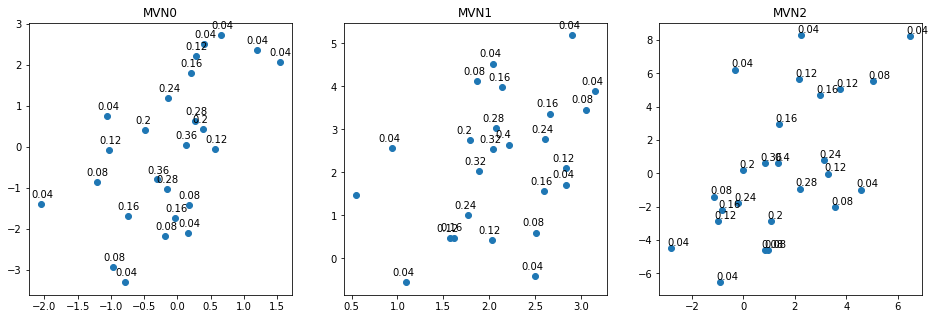

In [10]:
fig = plt.figure(figsize=(16,5))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    ax.scatter(data[i][:,0], data[i][:,1])
    ax.set_title("MVN"+str(i))
    for j, txt in enumerate(tuks[i]):
        ax.annotate(round(txt,2), (data[i][j, 0]-.15, data[i][j, 1]+.15))
plt.show()

In [13]:
import scipy.spatial

class MaxDepthClassifier():
    def __init__(self, depthName="mahalanobis", ndirs=0):
        self.depthName = depthName
        self.ndirs = ndirs
    def fit(self, X, y):
        self.X = X
        self.y = y
    def predict(self, X_pred):
        preds = []
        depth = []
        for c in [0,1]:
            if self.depthName == "mahalanobis":
                depth.append(depthMah(X_pred, self.X[self.y==c]))
            else:
                depth.append(depthTuk(X_pred, self.X[self.y==c]))
        preds = np.argmax(np.vstack(depth).T, 1)
        preds[np.sum(np.vstack(depth).T, 1)==0] = self.y[np.argmin(scipy.spatial.distance.cdist(X_pred[np.sum(np.vstack(depth).T, 1)==0], self.X), 1)]
        return preds

In [14]:
X = np.concatenate((np.random.multivariate_normal([0,0], [[1,1],[1,4]], 250), np.random.multivariate_normal([2,2], [[1,1],[1,4]], 250)))
y = np.concatenate((np.zeros(250),np.ones(250)))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, stratify=y)

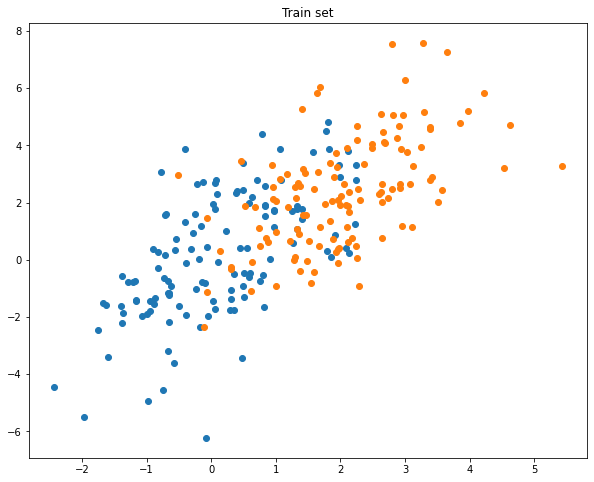

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1])
plt.scatter(X_train[y_train!=0,0], X_train[y_train!=0,1])
plt.title("Train set")
plt.show()

In [17]:
clf = MaxDepthClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

sum(y_pred==y_test)/len(y_pred)

0.84

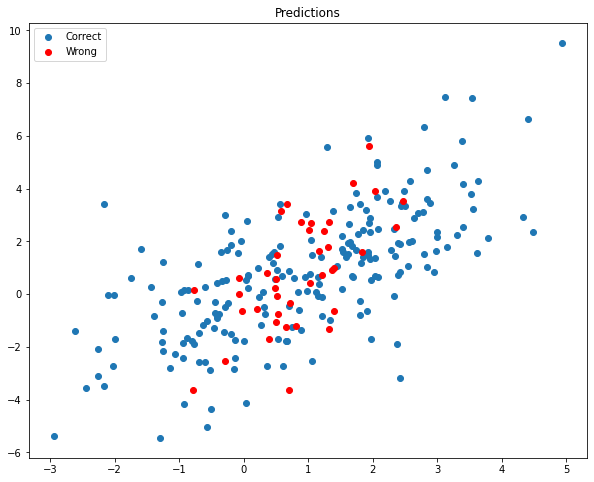

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(X_test[y_test==y_pred,0], X_test[y_test==y_pred,1], label="Correct")
plt.scatter(X_test[y_test!=y_pred,0], X_test[y_test!=y_pred,1], c="r", label="Wrong")
plt.legend()
plt.title("Predictions")
plt.show()

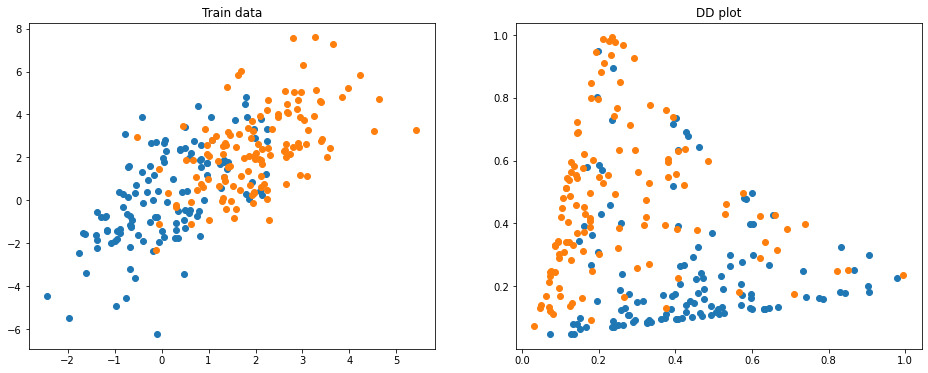

In [19]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
for c in [0,1]:
    ax.scatter(X_train[y_train==c,0], X_train[y_train==c,1])
ax.set_title("Train data")
ax = fig.add_subplot(1,2,2)
ax.scatter(depthMah(X_train[y_train==0], X_train[y_train==0]), depthMah(X_train[y_train==0], X_train[y_train==1]))
ax.scatter(depthMah(X_train[y_train==1], X_train[y_train==0]), depthMah(X_train[y_train==1], X_train[y_train==1]))
ax.set_title("DD plot")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X = np.concatenate((np.random.multivariate_normal([0,0], [[1,1],[1,4]], 250), np.random.multivariate_normal([2,2], [[4,4],[4,16]], 250)))
y = np.concatenate((np.zeros(250),np.ones(250)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, stratify=y, random_state=13)

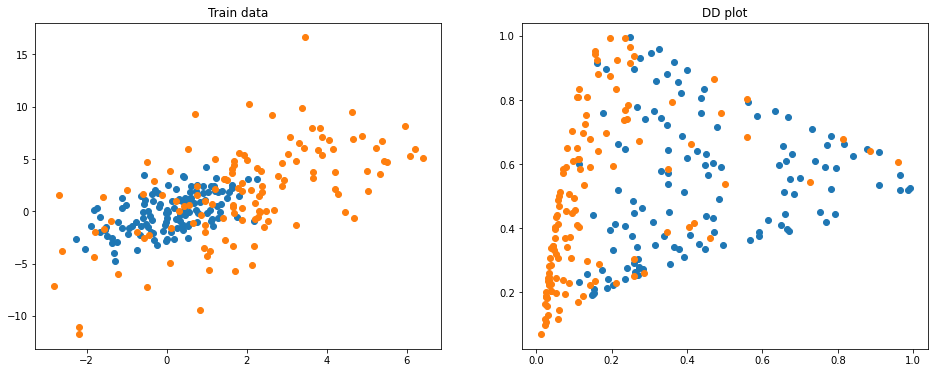

In [21]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
for c in [0,1]:
    ax.scatter(X_train[y_train==c,0], X_train[y_train==c,1])
ax.set_title("Train data")
ax = fig.add_subplot(1,2,2)
ax.scatter(depthMah(X_train[y_train==0], X_train[y_train==0]), depthMah(X_train[y_train==0], X_train[y_train==1]))
ax.scatter(depthMah(X_train[y_train==1], X_train[y_train==0]), depthMah(X_train[y_train==1], X_train[y_train==1]))
ax.set_title("DD plot")
plt.show()

In [29]:
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier

class DDClassifier():
    def __init__(self, depthName="mahalanobis", ndirs=100, k=11):
        self.depthName = depthName
        self.ndirs = ndirs
        self.k = k
    def fit(self, X, y):
        self.X = X
        self.y = y
        depths = []
        for c in np.unique(y):
            if self.depthName == "mahalanobis":
                depths.append(depthMah(X, X[y==c]))
            else:
                depths.append(depthTuk(X, X[y==c], self.ndirs))
        self.depths = np.vstack(depths).T
        self.knn = KNeighborsClassifier(self.k).fit(self.depths, self.y)
    def predict(self, X_pred):
        preds = []
        depth = []
        for c in [0,1]:
            if self.depthName == "mahalanobis":
                depth.append(depthMah(X_pred, self.X[self.y==c]))
            else:
                depth.append(depthTuk(X_pred, self.X[self.y==c], self.ndirs))
        preds = self.knn.predict(np.vstack(depth).T)
        preds[np.sum(np.vstack(depth).T, 1)==0] = self.y[np.argmin(scipy.spatial.distance.cdist(X_pred[np.sum(np.vstack(depth).T, 1)==0], self.X), 1)]
        return preds

In [30]:
from sklearn.model_selection import train_test_split

X = np.concatenate((np.random.multivariate_normal([0,0], [[1,1],[1,4]], 250), np.random.multivariate_normal([2,2], [[4,4],[4,16]], 250)))
y = np.concatenate((np.zeros(250),np.ones(250)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, stratify=y, random_state=13)

clf = DDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [31]:
sum(y_pred==y_test)/len(y_pred)

0.78

In [32]:
clf = MaxDepthClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
sum(y_pred==y_test)/len(y_pred)

0.744

In [34]:
def rmvt(mu, sigma, v, n):
    x = mu+((v/np.random.chisquare(v,n))**.5).reshape(-1,1)*np.random.multivariate_normal(np.zeros(len(sigma)), sigma, n)
    return x

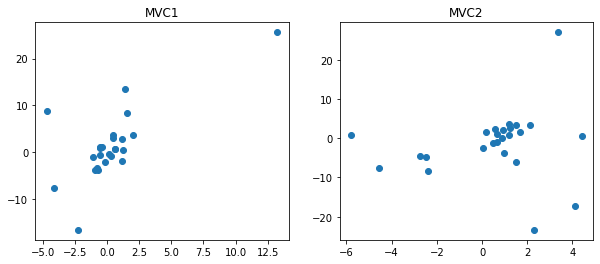

In [57]:
MVC1 = rmvt([0,0], [[1,1],[1,4]], 1, 25)
MVC2 = rmvt([1,1], [[1,1],[1,4]], 1, 25)

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.scatter(MVC1[:,0], MVC1[:,1])
ax.set_title("MVC1")
ax = fig.add_subplot(1,2,2)
ax.scatter(MVC2[:,0], MVC2[:,1])
ax.set_title("MVC2")
plt.show()

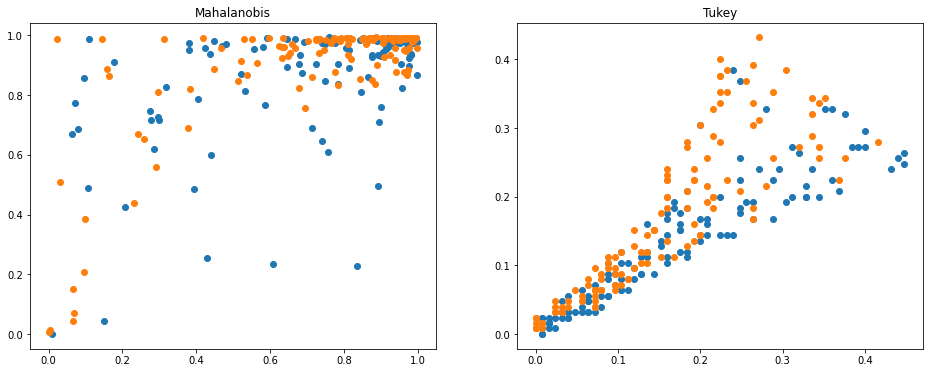

In [58]:
from sklearn.model_selection import train_test_split

X = np.concatenate((rmvt([0,0], [[1,1],[1,4]], 1, 250), rmvt([1,1], [[1,1],[1,4]], 1, 250)))
y = np.concatenate((np.zeros(250),np.ones(250)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, stratify=y, random_state=13)

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
ax.scatter(depthMah(X_train[y_train==0], X_train[y_train==0]), depthMah(X_train[y_train==0], X_train[y_train==1]))
ax.scatter(depthMah(X_train[y_train==1], X_train[y_train==0]), depthMah(X_train[y_train==1], X_train[y_train==1]))
ax.set_title("Mahalanobis")
ax = fig.add_subplot(1,2,2)
ax.scatter(depthTuk(X_train[y_train==0], X_train[y_train==0]), depthTuk(X_train[y_train==0], X_train[y_train==1]))
ax.scatter(depthTuk(X_train[y_train==1], X_train[y_train==0]), depthTuk(X_train[y_train==1], X_train[y_train==1]))
ax.set_title("Tukey")
plt.show()

In [59]:
clf = DDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [60]:
sum(y_pred==y_test)/len(y_pred)

0.528

In [61]:
clf = DDClassifier("tukey")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [62]:
sum(y_pred==y_test)/len(y_pred)

0.572

In [63]:
clf = MaxDepthClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [64]:
sum(y_pred==y_test)/len(y_pred)

0.516

In [65]:
clf = MaxDepthClassifier("tukey")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [66]:
sum(y_pred==y_test)/len(y_pred)

0.584